# Netflix Data: Classification

## Part 1 - Loading Data

Hypothesis: 

Null Hypothesis: 

In [1]:

import os
from pathlib import Path
import pandas as pd # for importing, reading, cleaning csv files
import numpy as np # for maths, of course
import matplotlib.pyplot as plt # so we can plot
import seaborn as sns
import plotly.express as px
from textwrap import wrap
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn import tree, metrics
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir)+r'\Data Society\Capstone\Data-Society-Netflix-Capstone\1. Data & Notebooks'
print(data_dir)

C:\Users\624679\Documents
C:\Users\624679\Documents\Data Society\Capstone\Data-Society-Netflix-Capstone\1. Data & Notebooks


In [2]:

merged_df = pd.read_csv(str(data_dir)+r'\merged_df.csv')
print(merged_df.dtypes)
print(merged_df.shape)
print(merged_df.info())


id                       object
title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
person_id                 int64
name                     object
character                object
role                     object
dtype: object
(72065, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72065 entries, 0 to 72064
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    72065 non-null  object 
 1   title                 72065 non-null  object 
 2   type                  72065 non-null  object 
 3   release_year          72065 n

In [3]:
print(merged_df.describe())

       release_year       runtime       seasons    imdb_score    imdb_votes  \
count  72065.000000  72065.000000  72065.000000  72065.000000  7.206500e+04   
mean    2014.733893     97.750531      0.378825      6.469064  5.926281e+04   
std        8.218854     34.644461      1.283899      1.103679  1.560165e+05   
min     1953.000000      0.000000      0.000000      1.600000  5.000000e+00   
25%     2013.000000     86.000000      0.000000      5.800000  1.611000e+03   
50%     2018.000000    100.000000      0.000000      6.500000  7.304000e+03   
75%     2020.000000    118.000000      0.000000      7.300000  4.758800e+04   
max     2022.000000    235.000000     42.000000      9.500000  2.268288e+06   

       tmdb_popularity    tmdb_score     person_id  
count     72065.000000  72065.000000  7.206500e+04  
mean         28.596678      6.677558  4.863762e+05  
std          68.954376      1.011388  6.061394e+05  
min           0.600000      1.000000  7.000000e+00  
25%           6.156000 

In [4]:
merged_df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,48933,Cybill Shepherd,Betsy,ACTOR


## Classification Model - EDA

In [5]:
movies_df = merged_df[merged_df['type'] == 'MOVIE']
movies_df=movies_df.drop(columns='seasons')
movies_df.shape
movies_df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,27.612,8.2,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,27.612,8.2,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,27.612,8.2,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,27.612,8.2,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,27.612,8.2,48933,Cybill Shepherd,Betsy,ACTOR


In [6]:
# movies_df = movies_df[movies_df['production_countries'] == "['US']"]
movies_df['imdb_score'] = movies_df['imdb_score'].round()
print(movies_df['imdb_score'])

0        8.0
1        8.0
2        8.0
3        8.0
4        8.0
        ... 
72060    2.0
72061    2.0
72062    2.0
72063    2.0
72064    2.0
Name: imdb_score, Length: 59422, dtype: float64


In [7]:
movies_df['credit_count'] = movies_df.groupby('person_id')['person_id'].transform('count')
movies_df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,credit_count
0,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.0,795222.0,27.612,8.2,3748,Robert De Niro,Travis Bickle,ACTOR,9
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.0,795222.0,27.612,8.2,14658,Jodie Foster,Iris Steensma,ACTOR,1
2,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.0,795222.0,27.612,8.2,7064,Albert Brooks,Tom,ACTOR,1
3,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.0,795222.0,27.612,8.2,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,4
4,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.0,795222.0,27.612,8.2,48933,Cybill Shepherd,Betsy,ACTOR,3


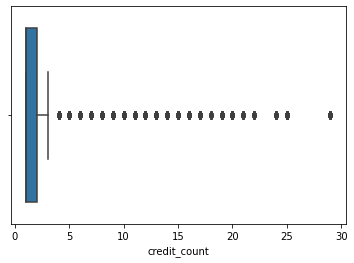

In [8]:
aX = sns.boxplot(x=movies_df['credit_count'])

In [9]:
#movies_df = movies_df[movies_df['production_countries'] == "['US']"]
df_mf = movies_df[movies_df['credit_count'] >= 3]
df_mf= df_mf.reset_index()
X = df_mf.drop(['imdb_score', 'id', 'imdb_id', 'production_countries', 'character', 'role', 'person_id','tmdb_popularity', 'tmdb_score', 'type', 'title'], axis=1)
y = np.array(df_mf[['imdb_score']])
np.random.seed(1)

X.head()

,index,release_year,age_certification,runtime,genres,imdb_votes,name,credit_count
0,0,1976,R,113,"['crime', 'drama']",795222.0,Robert De Niro,9
1,3,1976,R,113,"['crime', 'drama']",795222.0,Harvey Keitel,4
2,4,1976,R,113,"['crime', 'drama']",795222.0,Cybill Shepherd,3
3,9,1976,R,113,"['crime', 'drama']",795222.0,Martin Scorsese,4
4,28,1976,R,113,"['crime', 'drama']",795222.0,Debbi Morgan,3


In [10]:
X = pd.get_dummies(X, columns=['age_certification','genres','name'])
X.head()

,index,release_year,runtime,imdb_votes,credit_count,age_certification_G,age_certification_NC-17,age_certification_NR,age_certification_PG,age_certification_PG-13,...,name_Àlex Monner,name_Álvaro Cervantes,name_Çağlar Çorumlu,name_Ólafur Darri Ólafsson,name_Óscar Jaenada,name_Ülkü Duru,name_İlker Aksum,name_İrem Sak,name_Şafak Sezer,name_Şinasi Yurtsever
0,0,1976,113,795222.0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1976,113,795222.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1976,113,795222.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,1976,113,795222.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,1976,113,795222.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# data_dir_df = os.path.join(data_dir, 'df_mf_dummied.csv')
# if not os.path.exists(data_dir_df):
#    df_mf.to_csv(data_dir_df, index=False)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9488, 4131) (9488, 1)
(4067, 4131) (4067, 1)


In [16]:
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1995)
)

rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.91412013, 0.91306639, 0.91201264, 0.928835  , 0.91249341])

In [17]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9161055140583019, 0.006403386820216511)

In [21]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=5)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestclassifier__n_estimators': [10, 31, 100, 316, 1000],
 'standardscaler': [StandardScaler(), None]}

In [22]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [23]:
rf_grid_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rf_grid_cv.best_params_

In [ ]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores, np.mean(rf_best_scores), np.std(rf_best_scores)

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');

In [13]:
model = RandomForestClassifier(criterion='gini',
                                   n_estimators = 100,
                                   random_state=1995)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1995)

In [14]:
y_pred = model.predict(X_test)
print(y_pred[0:5,])

[8. 6. 7. 6. 7.]


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred,output_dict=True)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" %(result2*100.00))

Confusion Matrix:
[[  12    0    0    0    1    0    0    0]
 [   2   27    0    8    3    0    0    0]
 [   0    0  131    5   17    7    0    0]
 [   0    0    2  494   39   10    0    0]
 [   0    1    1   13 1405   36    9    0]
 [   0    1    0    8   57 1152    5    0]
 [   0    0    0    0   11   23  561    0]
 [   0    0    0    0    2    2    2   20]]
Classification Report:
{'2.0': {'precision': 0.8571428571428571, 'recall': 0.9230769230769231, 'f1-score': 0.888888888888889, 'support': 13}, '3.0': {'precision': 0.9310344827586207, 'recall': 0.675, 'f1-score': 0.7826086956521738, 'support': 40}, '4.0': {'precision': 0.9776119402985075, 'recall': 0.81875, 'f1-score': 0.8911564625850339, 'support': 160}, '5.0': {'precision': 0.9356060606060606, 'recall': 0.9064220183486239, 'f1-score': 0.9207828518173345, 'support': 545}, '6.0': {'precision': 0.9153094462540716, 'recall': 0.9590443686006825, 'f1-score': 0.9366666666666666, 'support': 1465}, '7.0': {'precision': 0.9365853658536586

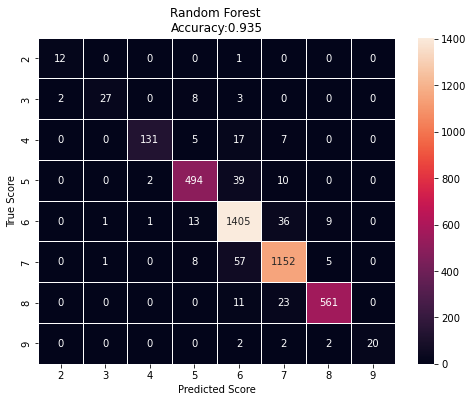

In [20]:
plt.figure(figsize=(8,6))

x_axis_labels =[2,3,4,5,6,7,8,9]
y_axis_labels =[2,3,4,5,6,7,8,9]

ax = sns.heatmap(result, xticklabels=x_axis_labels, yticklabels=y_axis_labels,
                 annot=True, fmt="d", linewidths=.5)

plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Score')
plt.xlabel('Predicted Score')
plt.show()

<AxesSubplot:>

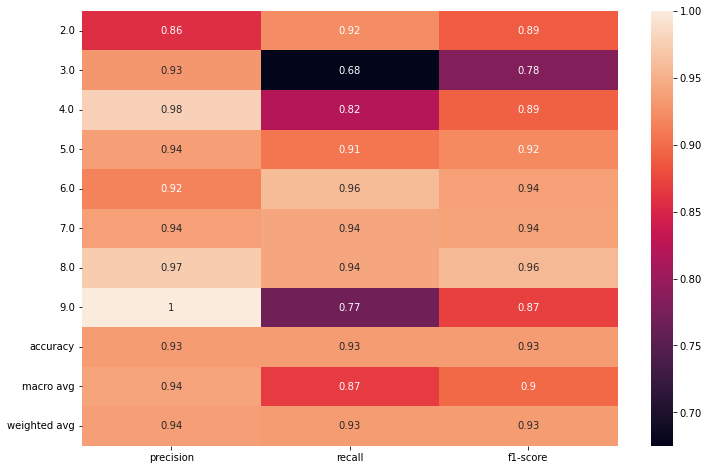

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(result1).iloc[:-1, :].T, annot=True)

In [18]:
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.935
